# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. More complex dataset**

- Implement the K-Nearest Neighbors algorithm for datasets with more complicated shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



---
---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$). Your goal is to:

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)




---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = +1 $
- $ x_8 = [3, -2] $  with $y_8 = -1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.4: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---


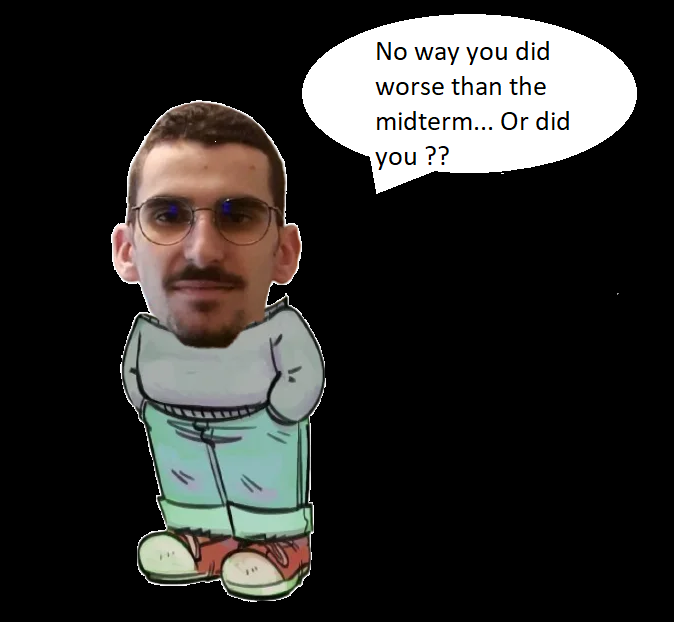